In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import precision_score as precision
from sklearn.metrics import recall_score as recall
from sklearn.metrics import f1_score as f1

In [2]:
df=pd.read_csv(r"../data/phishing_training.csv")

In [3]:
df.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [4]:
df.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [5]:
df.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [6]:
df.shape

(11054, 32)

In [7]:
df.isnull().sum()

Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [9]:
from sklearn.model_selection import train_test_split,cross_val_score

In [10]:
#X= df.drop(columns='Index')
X= df.drop(columns='class')
X.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,1,-1,-1,0,-1,1,1,1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,1,-1,1,-1,1,0,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
3,3,1,0,-1,1,1,-1,1,1,-1,...,1,-1,1,-1,-1,0,-1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,1,-1,1,-1,-1


In [11]:
Y=df['class']
Y=pd.DataFrame(Y)
Y.head()

,class
0,-1
1,-1
2,-1
3,1
4,1


In [12]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3,random_state=2020)

########################## MODELO DE CLASIFICACION USANDO FEATURES SELECCIONADOS ###########################
############################# Encontrando features importantes con Scikit-learn ############################


/home/lechu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


DomainRegLen           0.277776
LinksInScriptTags      0.262102
UsingIP                0.066123
PageRank               0.060309
HTTPS                  0.060090
SubDomains             0.042278
ServerFormHandler      0.040900
AnchorURL              0.020221
InfoEmail              0.018626
StatsReport            0.016619
Favicon                0.016075
LinksPointingToPage    0.012952
DNSRecording           0.012847
LongURL                0.010990
GoogleIndex            0.010075
WebsiteTraffic         0.009969
ShortURL               0.006680
RequestURL             0.005636
Symbol@                0.005249
AbnormalURL            0.005117
StatusBarCust          0.004739
Redirecting//          0.004718
IframeRedirection      0.004670
WebsiteForwarding      0.004284
NonStdPort             0.004226
PrefixSuffix-          0.003664
class                  0.003622
DisableRightClick      0.003197
HTTPSDomainURL         0.002986
AgeofDomain            0.001892
UsingPopupWindow       0.001368
dtype: f

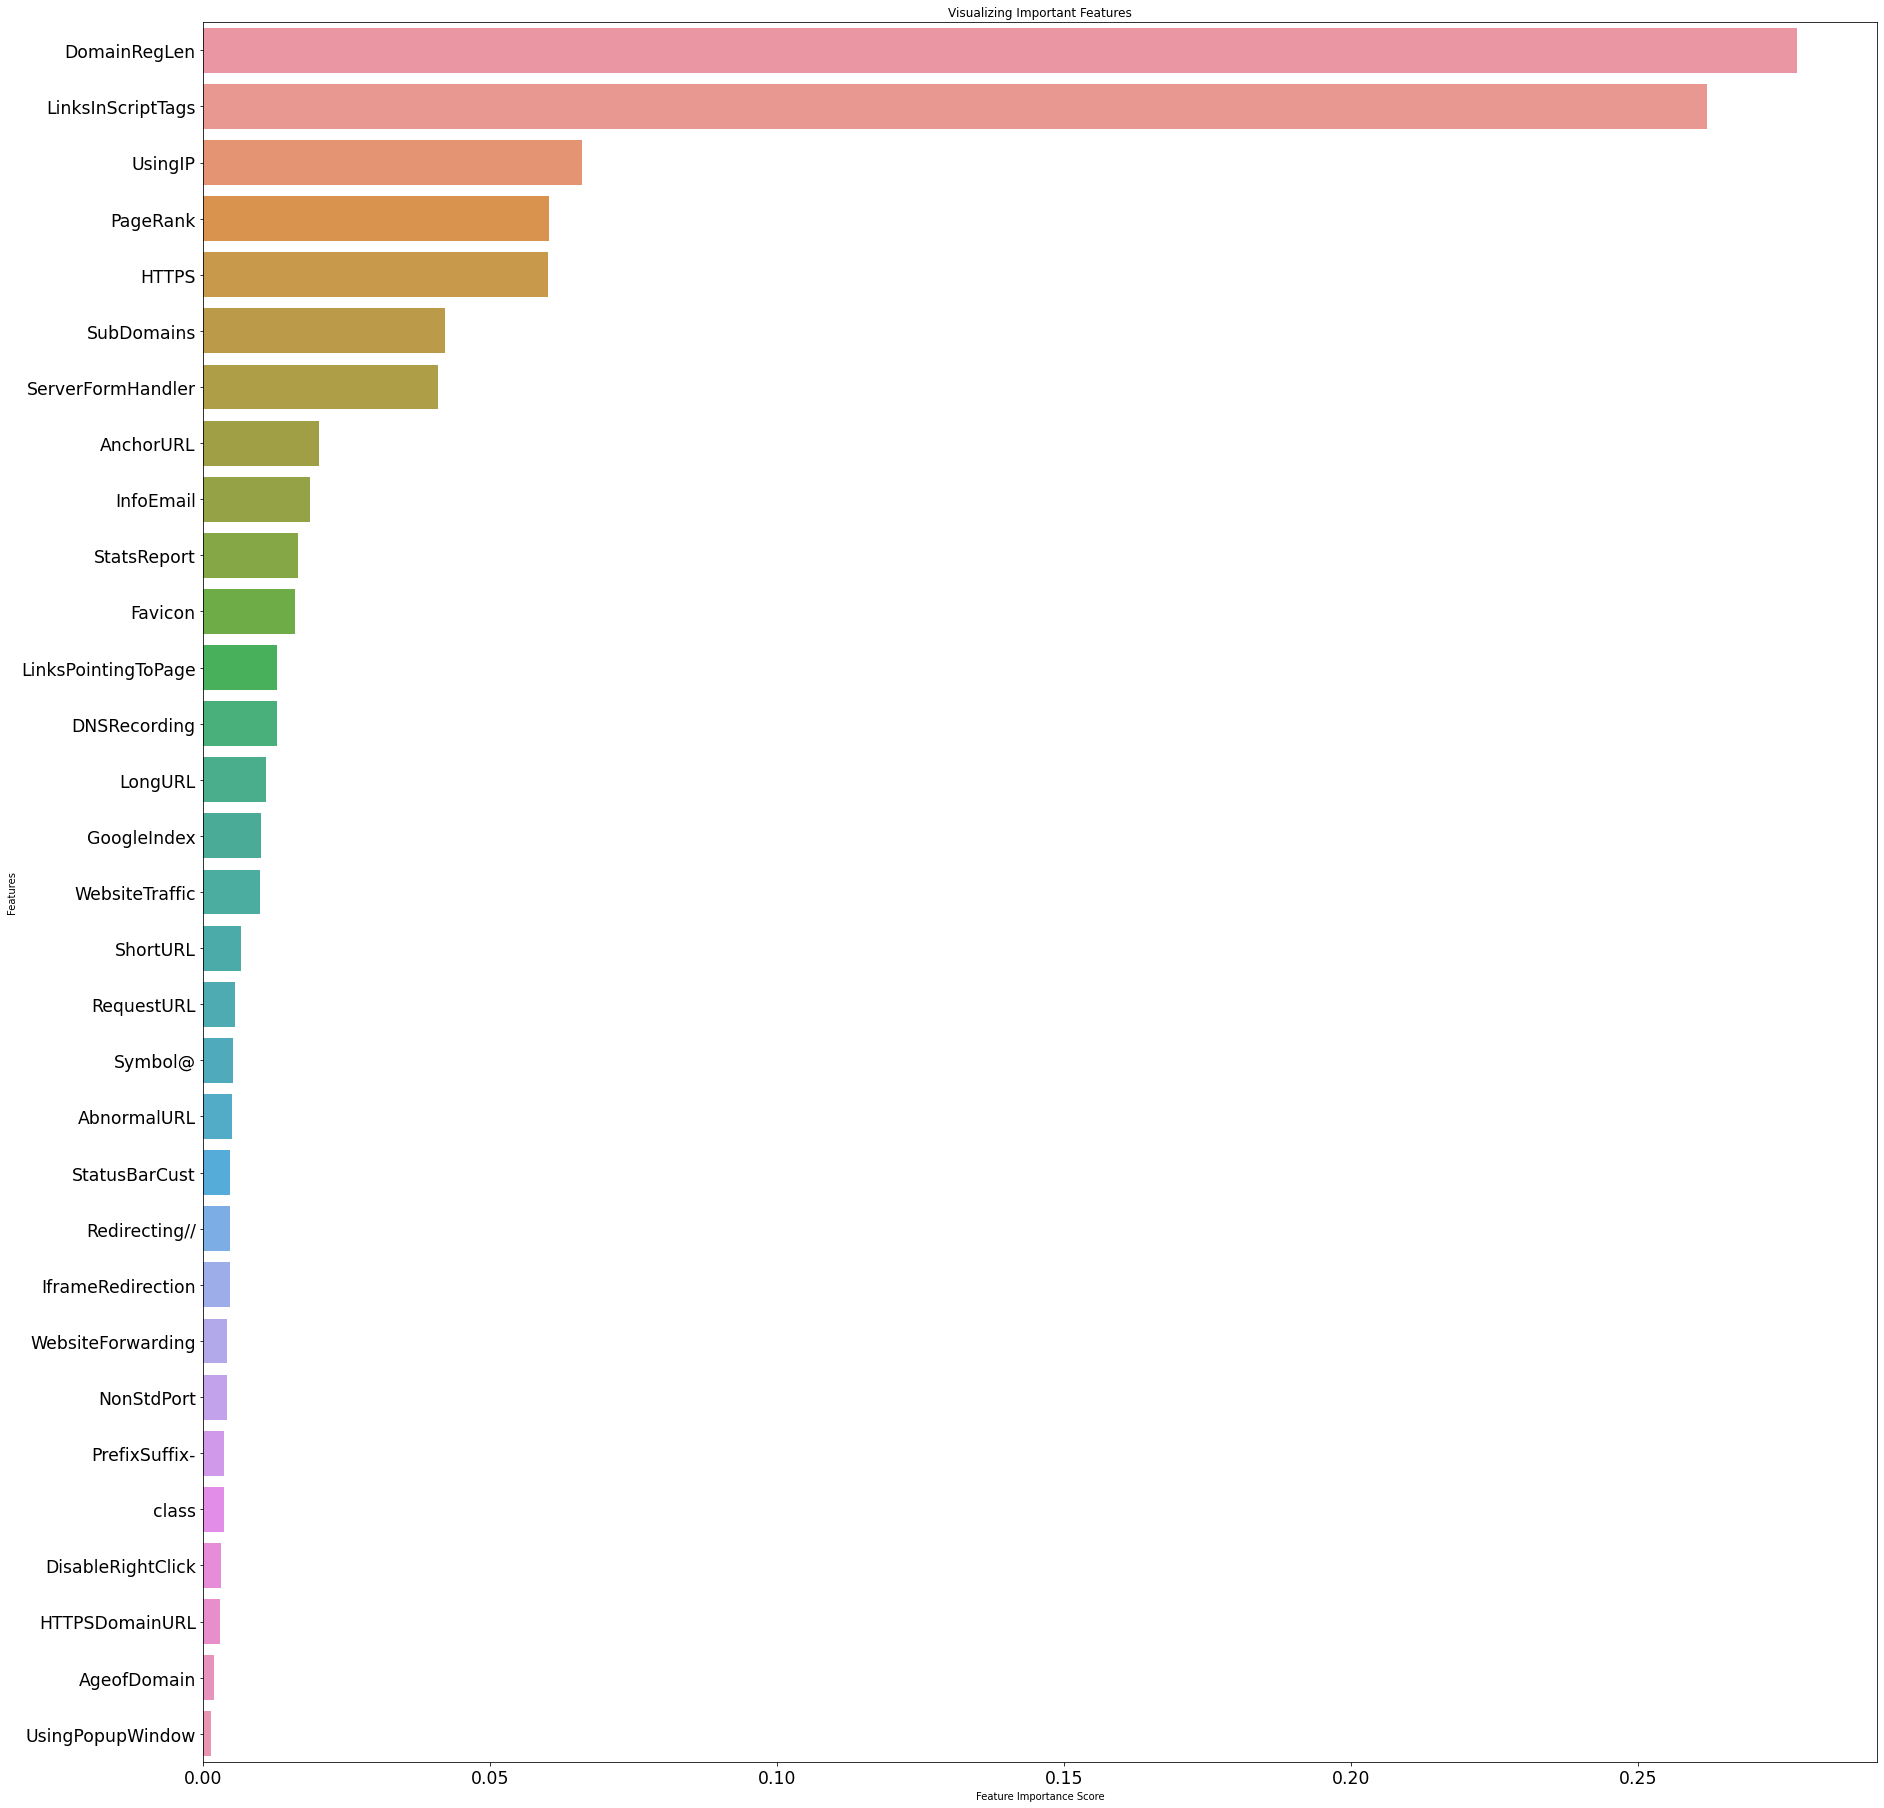

In [13]:
print('########################## MODELO DE CLASIFICACION USANDO FEATURES SELECCIONADOS ###########################')
print('############################# Encontrando features importantes con Scikit-learn ############################')
clf = RandomForestClassifier(random_state=2020)
clf.fit(train_X, train_Y)

feature_names = list(df.iloc[:, 1:32].columns)
# print(feature_names)

# Calcular la importancia de cada uno de los 11 features
feature_importance = pd.Series(clf.feature_importances_, index=feature_names).sort_values(ascending=False)
print(feature_importance)

print('################################## Grafico de barras con importantacia features ##################################')
figsize(30, 32)
# Crear barras de features del grafico
sns.barplot(x=feature_importance, y=feature_importance.index, seed=2020)
# Añadir etiquetas de los features al grafico
plt.xlabel('Feature Importance Score')
plt.xticks(size=70, fontsize='xx-large' )
plt.ylabel('Features')
plt.yticks(size=70, fontsize='xx-large' )
plt.title("Visualizing Important Features")
# plt.legend
plt.savefig('barras-importancia-11features.png')
plt.show()

In [14]:
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.fit_transform(test_X)

In [15]:
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(7737, 31)
(3317, 31)
(7737, 1)
(3317, 1)


In [16]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [17]:
def plot_confusion_matrix(test_Y, predict_y):
 C = confusion_matrix(test_Y, predict_y)
 A =(((C.T)/(C.sum(axis=1))).T)
 B =(C/C.sum(axis=0))
 plt.figure(figsize=(20,4))
 labels = [1,2]
 cmap=sns.light_palette("blue")
 plt.subplot(1, 3, 1)
 sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Confusion matrix")
 plt.subplot(1, 3, 2)
 sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Precision matrix")
 plt.subplot(1, 3, 3)
 sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Recall matrix")
 plt.show()

In [18]:
def evaluate(model_name, model, testing_features, test_labels):
    np.seterr(divide='ignore', invalid='ignore')
    predictions = model.predict(testing_features)
    accuracy = acc(test_labels, predictions)
    error_rate = 1 - accuracy
    precision_score = precision(test_labels, predictions)
    recall_score = recall(test_labels, predictions)
    f1_score = f1(test_labels, predictions)
    print('Desempeño del modelo de ' + model_name)
    print('Error Rate: {:0.2f}%.'.format(100 * error_rate))
    print('Accuracy = {:0.2f}%.'.format(100 * accuracy))
    print('Precision = {:0.2f}%.'.format(100 * precision_score))
    print('Recall = {:0.2f}%.'.format(100 * recall_score))
    print('F1 Score = {:0.2f}%.'.format(100 * f1_score))

In [19]:
logreg=LogisticRegression(random_state=2020)
model_1=logreg.fit(train_X,train_Y)

/home/lechu/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [20]:
logreg_predict= model_1.predict(test_X)

In [21]:
accuracy_score(logreg_predict,test_Y)

0.9291528489599036

In [22]:
evaluate('Regresión Logística', model_1, test_X, test_Y ) 

Desempeño del modelo de Regresión Logística
Error Rate: 7.08%.
Accuracy = 92.92%.
Precision = 93.07%.
Recall = 94.42%.
F1 Score = 93.74%.


In [23]:
print(classification_report(logreg_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.91      0.93      0.92      1427
           1       0.94      0.93      0.94      1890

    accuracy                           0.93      3317
   macro avg       0.93      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317



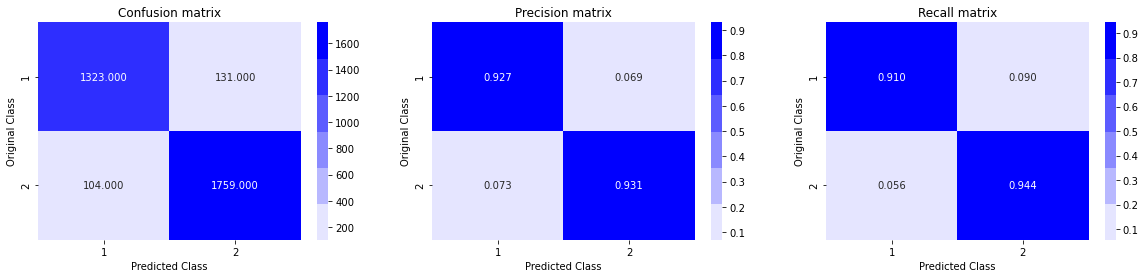

In [24]:
plot_confusion_matrix(test_Y, logreg_predict)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn=KNeighborsClassifier(n_neighbors=3)
model_2= knn.fit(train_X,train_Y)

/home/lechu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [27]:
knn_predict=model_2.predict(test_X)

In [28]:
accuracy_score(knn_predict,test_Y)

0.9499547784142297

In [29]:
evaluate('K-Vecinos Más Cercanos', model_2, test_X, test_Y ) 

Desempeño del modelo de K-Vecinos Más Cercanos
Error Rate: 5.00%.
Accuracy = 95.00%.
Precision = 95.79%.
Recall = 95.28%.
F1 Score = 95.53%.


In [30]:
print(classification_report(test_Y,knn_predict))

              precision    recall  f1-score   support

          -1       0.94      0.95      0.94      1454
           1       0.96      0.95      0.96      1863

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



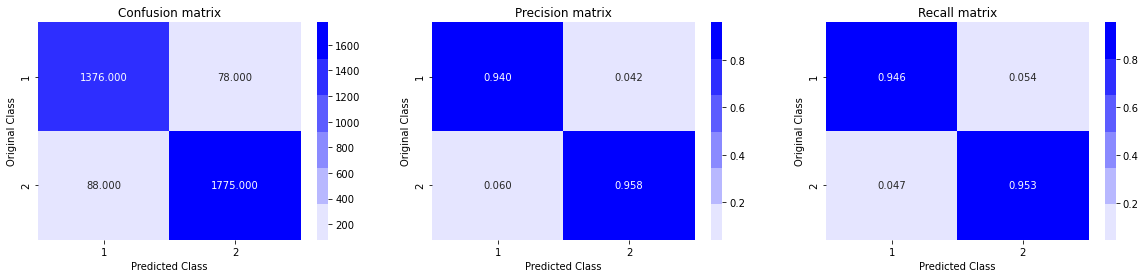

In [31]:
plot_confusion_matrix(test_Y, knn_predict)

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dtree=DecisionTreeClassifier(random_state=2020)
model_3=dtree.fit(train_X,train_Y)

In [34]:
dtree_predict=model_3.predict(test_X)

In [35]:
accuracy_score(dtree_predict,test_Y)

0.9463370515526078

In [36]:
evaluate('Árbol de Decisión', model_3, test_X, test_Y ) 

Desempeño del modelo de Árbol de Decisión
Error Rate: 5.37%.
Accuracy = 94.63%.
Precision = 95.27%.
Recall = 95.17%.
F1 Score = 95.22%.


In [37]:
print(classification_report(dtree_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.94      0.94      0.94      1456
           1       0.95      0.95      0.95      1861

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



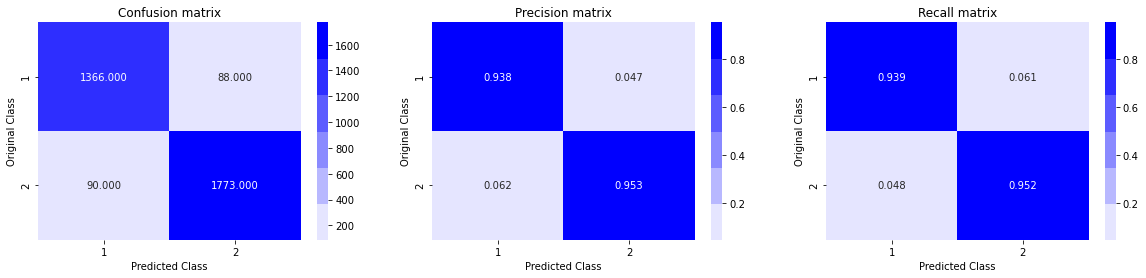

In [38]:
plot_confusion_matrix(test_Y, dtree_predict)

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfc=RandomForestClassifier(random_state=2020)
model_4=rfc.fit(train_X,train_Y)

/home/lechu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [41]:
rfc_predict=model_4.predict(test_X)

In [42]:
accuracy_score(rfc_predict,test_Y)

0.966536026529997

In [43]:
evaluate('Bosque Aleatorio', model_4, test_X, test_Y ) 

Desempeño del modelo de Bosque Aleatorio
Error Rate: 3.35%.
Accuracy = 96.65%.
Precision = 97.20%.
Recall = 96.83%.
F1 Score = 97.02%.


In [44]:
print(classification_report(rfc_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.96      0.96      0.96      1461
           1       0.97      0.97      0.97      1856

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



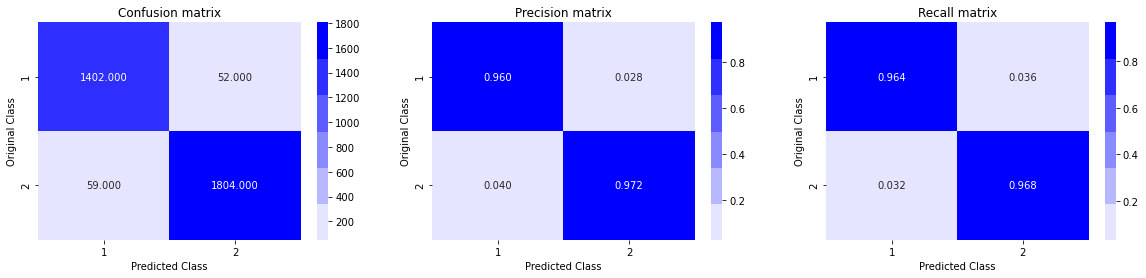

In [45]:
plot_confusion_matrix(test_Y, rfc_predict)

In [46]:
from sklearn.svm import SVC

In [47]:
svc=SVC(random_state=2020)
model_5=svc.fit(train_X,train_Y)

/home/lechu/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [48]:
svm_predict=model_5.predict(test_X)

In [49]:
accuracy_score(svm_predict,test_Y)

0.9493518239372928

In [50]:
evaluate('Soporte Vectorial', model_5, test_X, test_Y ) 

Desempeño del modelo de Soporte Vectorial
Error Rate: 5.06%.
Accuracy = 94.94%.
Precision = 95.49%.
Recall = 95.49%.
F1 Score = 95.49%.


In [51]:
print(classification_report(svm_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.94      0.94      0.94      1454
           1       0.95      0.95      0.95      1863

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



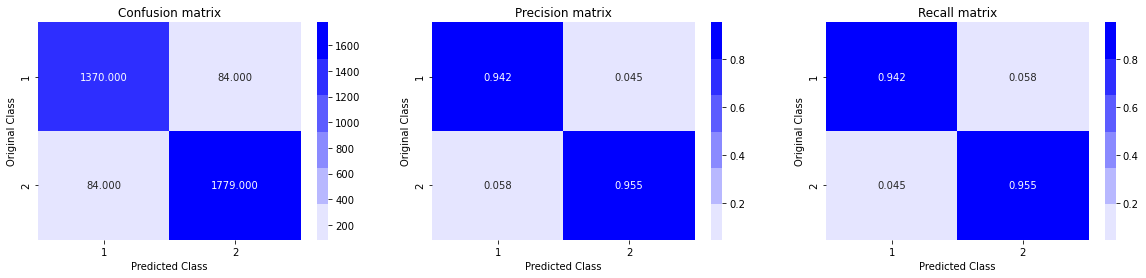

In [52]:
plot_confusion_matrix(test_Y, svm_predict)

In [53]:
from sklearn.ensemble import AdaBoostClassifier

In [54]:
adc=AdaBoostClassifier(n_estimators=5,learning_rate=1)
model_6=adc.fit(train_X,train_Y)

/home/lechu/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [55]:
adc_predict=model_6.predict(test_X)

In [56]:
accuracy_score(adc_predict,test_Y)

0.9237262586674706

In [57]:
print(classification_report(adc_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.92      0.91      0.91      1467
           1       0.93      0.94      0.93      1850

    accuracy                           0.92      3317
   macro avg       0.92      0.92      0.92      3317
weighted avg       0.92      0.92      0.92      3317



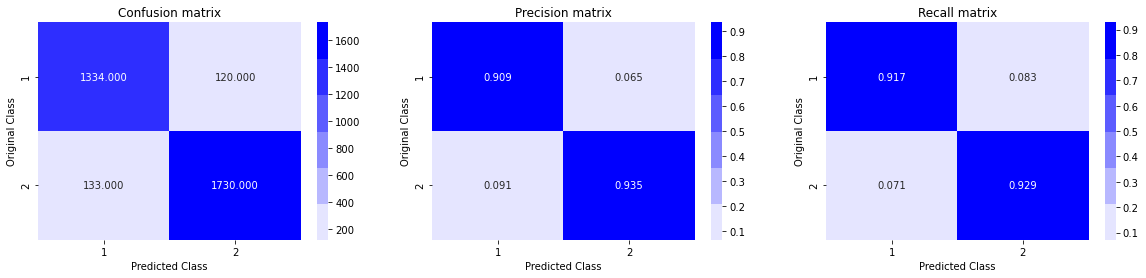

In [58]:
plot_confusion_matrix(test_Y, adc_predict)

In [59]:
from xgboost import XGBClassifier

In [60]:
xgb=XGBClassifier()
model_7=xgb.fit(train_X,train_Y)

/home/lechu/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [61]:
xgb_predict=model_7.predict(test_X)

In [62]:
accuracy_score(xgb_predict,test_Y)

0.9490503466988243

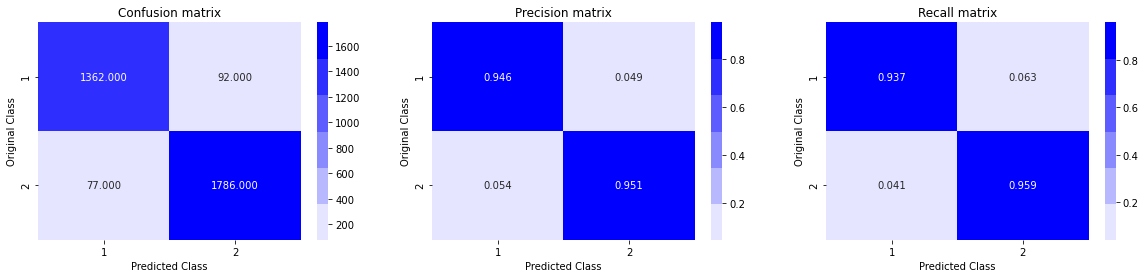

In [63]:
plot_confusion_matrix(test_Y, xgb_predict)

In [64]:
print('Logistic Regression Accuracy:',accuracy_score(logreg_predict,test_Y))
print('K-Nearest Neighbour Accuracy:',accuracy_score(knn_predict,test_Y))
print('Decision Tree Classifier Accuracy:',accuracy_score(dtree_predict,test_Y))
print('Random Forest Classifier Accuracy:',accuracy_score(rfc_predict,test_Y))
print('support Vector Machine Accuracy:',accuracy_score(svm_predict,test_Y))
print('Adaboost Classifier Accuracy:',accuracy_score(adc_predict,test_Y))
print('XGBoost Accuracy:',accuracy_score(xgb_predict,test_Y))

Logistic Regression Accuracy: 0.9291528489599036
K-Nearest Neighbour Accuracy: 0.9499547784142297
Decision Tree Classifier Accuracy: 0.9463370515526078
Random Forest Classifier Accuracy: 0.966536026529997
support Vector Machine Accuracy: 0.9493518239372928
Adaboost Classifier Accuracy: 0.9237262586674706
XGBoost Accuracy: 0.9490503466988243


Continuará ...